In [49]:
%matplotlib inline
import glob
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import statsmodels.tsa.arima_process as ap


## Combine all CSVs into one DataFrame

In [2]:
%%time

# Get list of all Actual Load Excel files
path = '../data/raw/MISO - Regional Forecast and Actual Load'
allFilePaths = glob.glob(path + "/*.xls")

dfLoad = pd.DataFrame()

for filePath in allFilePaths:
    print filePath
    
    # Import Excel
    df = pd.read_excel(filePath, skiprows=5, skipfooter=3)

    # Filter out the unwanted cells
    df = df.iloc[1:25, 1:]

    # Convert column dtypes to float
    df[df.columns.values[1:]] = df[df.columns.values[1:]].astype(float)

    # Find the daily mean
    #df = df.drop('HourEnding', axis=1).groupby('Market Day').mean()
    
    # Append to main DataFrame
    dfLoad = pd.concat([dfLoad, df])

../data/raw/MISO - Regional Forecast and Actual Load\20090707_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090708_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090709_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090710_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090711_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090712_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090713_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090714_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090715_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090716_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090717_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090718_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090719_rf_al.xls
../data/raw/MISO - Regional Forecast and Actual Load\20090720_rf

In [32]:
dfLoad.head()

,Central ActualLoad (MWh),Central MTLF (MWh),East ActualLoad (MWh),East MTLF (MWh),HourEnding,MISO ActualLoad (MWh),MISO ISO MTLF (MWh),MISO MTLF (MWh),Market Day,Midwest ISO ActualLoad (MWh),Midwest ISO MTLF (MWh),North ActualLoad (MWh),North MTLF (MWh),South ActualLoad (MWh),South MTLF (MWh),West ActualLoad (MWh),West MTLF (MWh)
1,16274.62,16400,21541.10,22685,1,NaN,NaN,NaN,07/06/2009,47815.77,49208,NaN,NaN,NaN,NaN,10000.05,10123
2,15590.06,15643,20704.83,22162,2,NaN,NaN,NaN,07/06/2009,45713.41,47417,NaN,NaN,NaN,NaN,9418.52,9612
3,15158.88,15233,20323.99,21839,3,NaN,NaN,NaN,07/06/2009,44624.45,46451,NaN,NaN,NaN,NaN,9141.58,9379
4,15166.17,15132,20385.15,22036,4,NaN,NaN,NaN,07/06/2009,44574.54,46478,NaN,NaN,NaN,NaN,9023.22,9310
5,15635.72,15747,21324.51,23075,5,NaN,NaN,NaN,07/06/2009,46102.43,48275,NaN,NaN,NaN,NaN,9142.20,9453


In [7]:
dfLoad.tail()

,Central ActualLoad (MWh),Central MTLF (MWh),East ActualLoad (MWh),East MTLF (MWh),HourEnding,MISO ActualLoad (MWh),MISO ISO MTLF (MWh),MISO MTLF (MWh),Market Day,Midwest ISO ActualLoad (MWh),Midwest ISO MTLF (MWh),North ActualLoad (MWh),North MTLF (MWh),South ActualLoad (MWh),South MTLF (MWh),West ActualLoad (MWh),West MTLF (MWh)
20,42212.02,42337,NaN,NaN,20,79136.30,NaN,79376,11/16/2015,NaN,NaN,17320.42,17805,19603.86,19234,NaN,NaN
21,41342.35,41422,NaN,NaN,21,77691.16,NaN,77835,11/16/2015,NaN,NaN,16963.00,17404,19385.81,19009,NaN,NaN
22,39892.51,39902,NaN,NaN,22,75122.40,NaN,75317,11/16/2015,NaN,NaN,16353.75,16853,18876.14,18562,NaN,NaN
23,37570.66,37743,NaN,NaN,23,71372.95,NaN,71672,11/16/2015,NaN,NaN,15517.08,16033,18285.21,17896,NaN,NaN
24,35313.88,35448,NaN,NaN,24,66962.21,NaN,67369,11/16/2015,NaN,NaN,14390.40,14931,17257.93,16990,NaN,NaN


## Write DataFrame to CSV

In [29]:
dfLoad.to_csv('../data/MISOActualLoad.csv')

In [43]:
westdf = dfLoad['West ActualLoad (MWh)']
westdf = westdf.fillna(0)
cendf = dfLoad['Central ActualLoad (MWh)']
num_hours = len(cendf)
idx = pd.date_range('7/6/2009', periods = num_hours, freq = 'H')
westdf.index = idx
cendf.index = idx
cendf = cendf+westdf
cendf = pd.DataFrame(cendf)
cendf.plot()

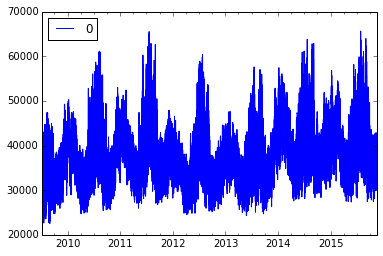

In [46]:
cendf.tail()

,0
2015-11-16 19:00:00,42212.02
2015-11-16 20:00:00,41342.35
2015-11-16 21:00:00,39892.51
2015-11-16 22:00:00,37570.66
2015-11-16 23:00:00,35313.88


In [47]:
cendf.to_csv('../data/Load_MISO_central_west.csv')

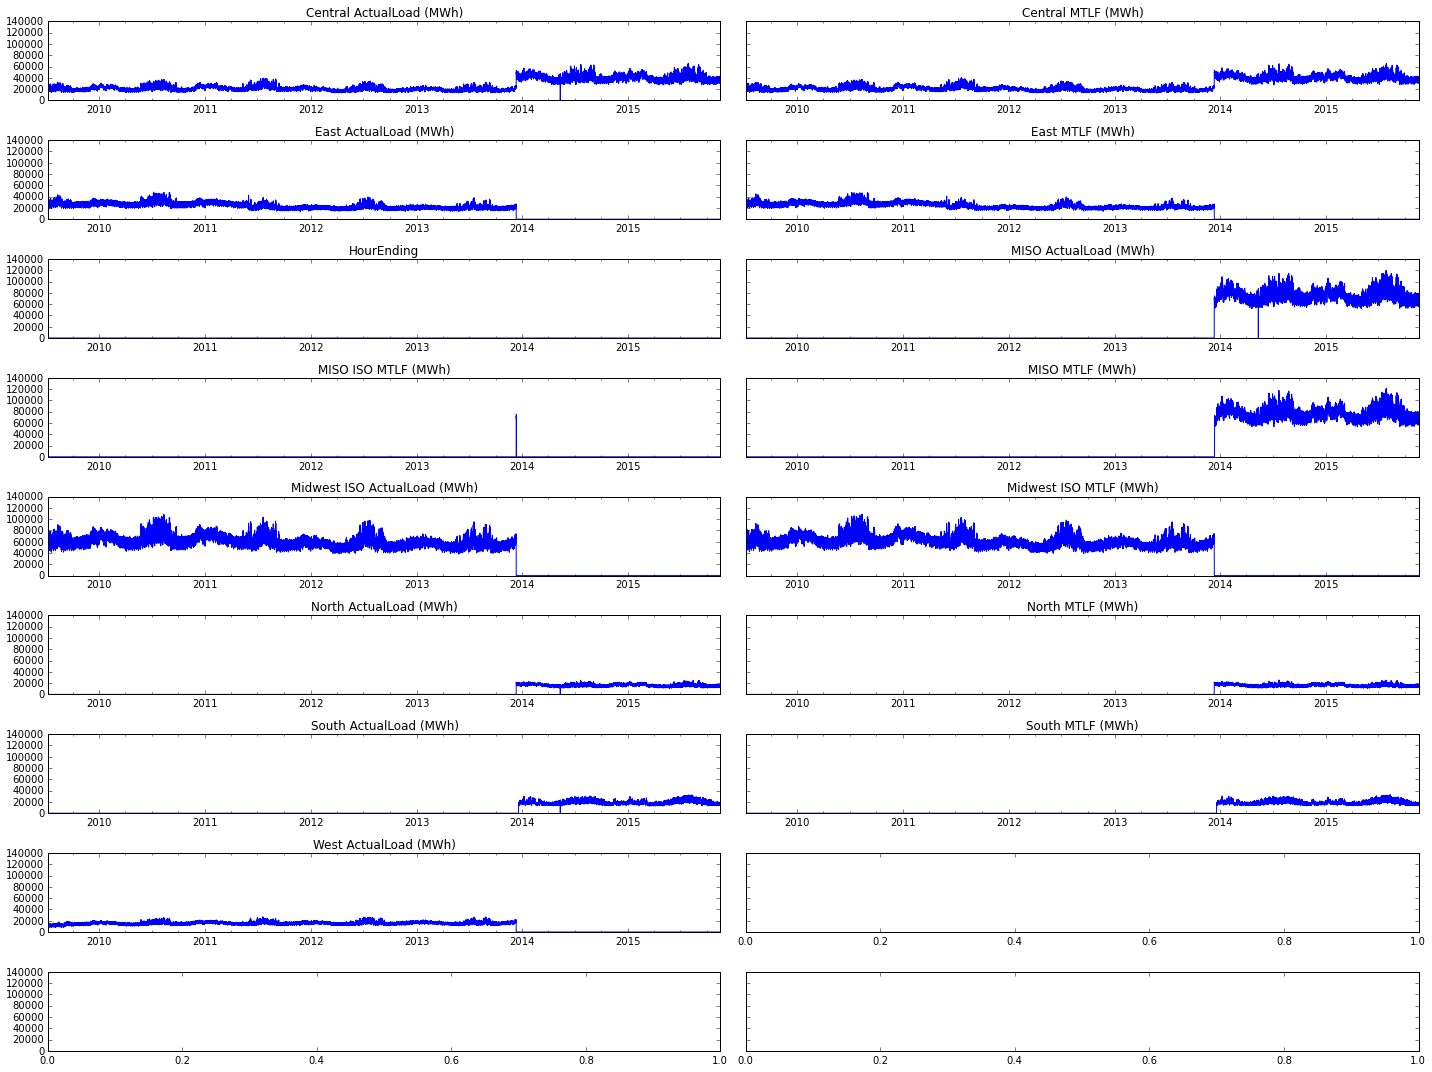

In [38]:
temp = dfLoad.fillna(0)
num_hours = len(temp)
idx = pd.date_range('7/6/2009', periods = num_hours, freq = 'H')
temp.index = idx
temp = temp.drop('Market Day',1)


fig, axes = plt.subplots(nrows=9,ncols=2,figsize=(20,15),tight_layout=True,sharey=True)
headers = list(temp)
ax = axes.ravel()

for i in range(15):
    k = temp.iloc[:,i]
    k.plot(ax=ax[i], title=headers[i])